<a href="https://colab.research.google.com/gist/Larinwa/560906e60e2a4fab28fc72dbae8aa67f/ba_dataet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SENTIMENT ANALYSIS

In [ ]:
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download the stopwords
nltk.download('punkt')
nltk.download('stopwords')



[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [ ]:
df_reviews = pd.read_csv("BA_review.csv")

In [ ]:
df_reviews['reviews'] = df_reviews['reviews'].str.replace('Trip Verified', '', regex=False)

In [ ]:
import re

df_reviews['reviews'] = df_reviews['reviews'].str.encode('ascii', 'ignore').str.decode('ascii')
df_reviews['reviews'] = df_reviews['reviews'].str.replace('|', '', regex=False)

In [ ]:
df_reviews = df_reviews.drop(df_reviews.columns[0], axis=1)

In [ ]:
df_reviews

,reviews
0,"Ive flown with many airlines, but my recent..."
1,I recently flew from New York back to Lon...
2,Not Verified BA business class in Europe has ...
3,Our flight started in Seattle Wa heading to...
4,British Airways Flight from Edinburgh got...
...,...
995,I flew yesterday from Heathrow to Manchest...
996,The first part from Brussels to London Hea...
997,Stockholm to London. Worst business class ...
998,Seems like no one was aware of my existence...


In [ ]:
# Tokenize each review
df_reviews['Tokens'] = df_reviews['reviews'].apply(word_tokenize)

In [ ]:


stop_words = set(stopwords.words("english"))
df_reviews['Filtered_Tokens'] = df_reviews['Tokens'].apply(lambda x: [token.lower() for token in x if token.lower() not in stop_words])


In [ ]:
w = sorted(word_freq.most_common(50)) # you can set yours to any value of your choice


key = ["cancelled",'customer','experience','food','seat','seats','service','passenger']

In [ ]:
for word, freq in w:
    if word in key:#ignore this particular line
        print(f'{word}:{freq}')

cancelled:223
customer:303
experience:261
food:428
seat:440
seats:385
service:732


In [ ]:
df_reviews.drop(columns = ["Tokens", "Filtered_Tokens"], axis = 1, inplace = True)

In [ ]:
# Define a cleaning function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters, numbers, and punctuation
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenize the text
    words = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)

# Apply cleaning to the reviews
df_reviews['cleaned_review'] = df_reviews['reviews'].apply(preprocess_text)


In [ ]:
df_reviews.head()

,reviews,cleaned_review
0,"Ive flown with many airlines, but my recent...",ive flown many airlines recent experience brit...
1,I recently flew from New York back to Lon...,recently flew new york back london ba wasnt fi...
2,Not Verified BA business class in Europe has ...,verified ba business class europe seat economy...
3,Our flight started in Seattle Wa heading to...,flight started seattle wa heading lisbon portu...
4,British Airways Flight from Edinburgh got...,british airways flight edinburgh got delayed h...


In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize VADER sentiment analyzer
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

# Function to get sentiment score
def get_sentiment(text):
    sentiment = sia.polarity_scores(text)
    return sentiment['compound']  # Use compound score (overall sentiment)

# Apply sentiment analysis to the cleaned reviews
df_reviews['sentiment'] = df_reviews['cleaned_review'].apply(get_sentiment)

# Classify the sentiment: Positive, Negative, Neutral
df_reviews['sentiment_label'] = df_reviews['sentiment'].apply(lambda score: 'Positive' if score > 0 else 'Negative' if score < 0 else 'Neutral')



[nltk_data] Error loading vader_lexicon: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [ ]:
df_reviews.head()

,reviews,cleaned_review,sentiment,sentiment_label
0,"Ive flown with many airlines, but my recent...",ive flown many airlines recent experience brit...,0.9218,Positive
1,I recently flew from New York back to Lon...,recently flew new york back london ba wasnt fi...,0.9945,Positive
2,Not Verified BA business class in Europe has ...,verified ba business class europe seat economy...,0.5106,Positive
3,Our flight started in Seattle Wa heading to...,flight started seattle wa heading lisbon portu...,0.6712,Positive
4,British Airways Flight from Edinburgh got...,british airways flight edinburgh got delayed h...,-0.1531,Negative


In [ ]:
import gensim
from gensim import corpora
from nltk.tokenize import word_tokenize

# Tokenize the reviews
tokenized_reviews = [word_tokenize(text) for text in df_reviews['cleaned_review']]

# Create a dictionary and corpus for LDA
dictionary = corpora.Dictionary(tokenized_reviews)
corpus = [dictionary.doc2bow(text) for text in tokenized_reviews]

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

# Display the topics
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)


(0, '0.028*"flight" + 0.016*"ba" + 0.009*"london" + 0.006*"one" + 0.006*"service"')
(1, '0.018*"ba" + 0.013*"flight" + 0.011*"service" + 0.010*"time" + 0.008*"good"')
(2, '0.030*"flight" + 0.016*"ba" + 0.009*"us" + 0.008*"get" + 0.008*"hours"')
(3, '0.015*"ba" + 0.011*"service" + 0.010*"crew" + 0.008*"cabin" + 0.007*"flight"')
(4, '0.020*"flight" + 0.012*"class" + 0.011*"ba" + 0.011*"seat" + 0.011*"business"')


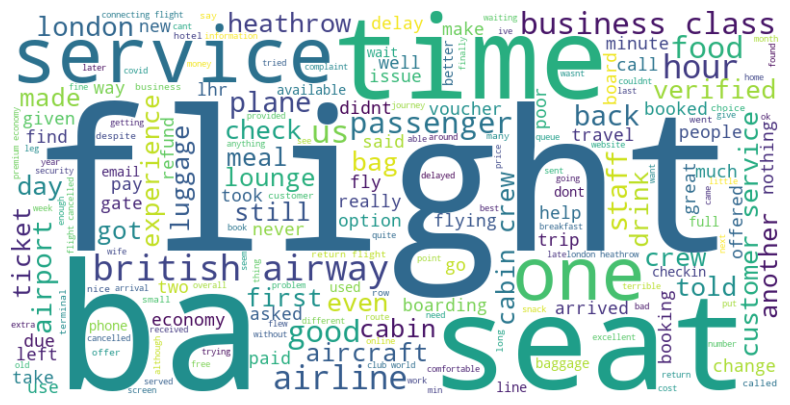

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Join all reviews into one text
all_reviews = ' '.join(df_reviews['cleaned_review'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


Positive    545
Negative    448
Neutral       7
Name: sentiment_label, dtype: int64


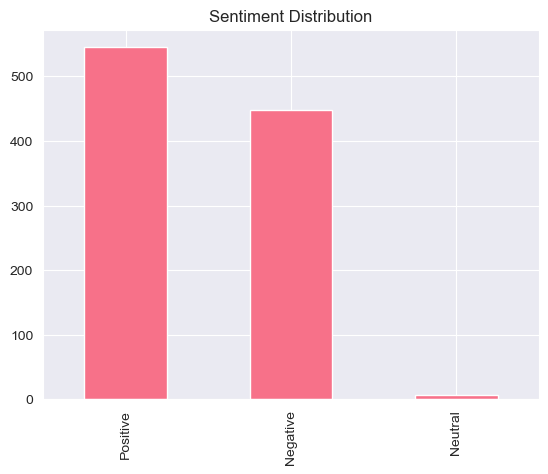

In [ ]:
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('husl')
# Summary of sentiment labels
sentiment_summary = df_reviews['sentiment_label'].value_counts()
print(sentiment_summary)

# Plot sentiment distribution
sentiment_summary.plot(kind='bar', title='Sentiment Distribution')
plt.show()


In [ ]:
import matplotlib.pyplot as plt

categories = ['Positive', 'Negative', 'Neutral']
percentages = [54.6, 44.7, 0.7]  #
# Define your colors
colors = ['orange','red', 'green']  # You can customize this list


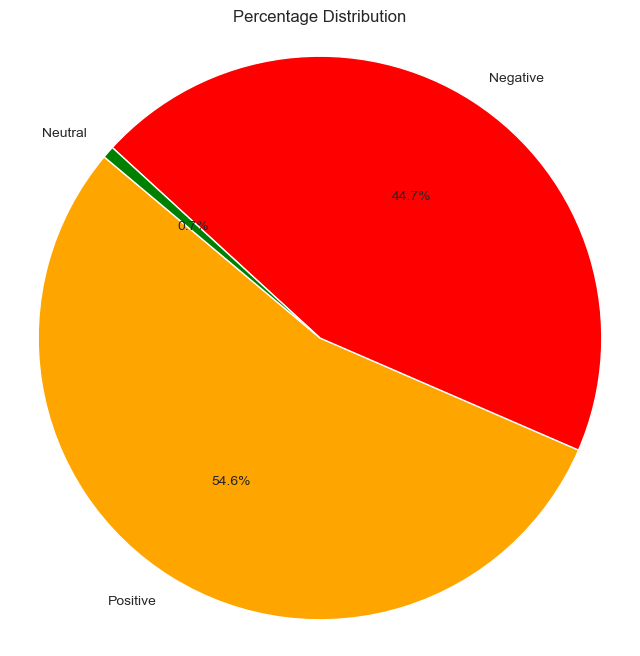

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(percentages, labels=categories, autopct='%1.1f%%', startangle=140,colors=colors)
plt.title('Percentage Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Scraping Customer Reviews:
___
1000 Customer reviews were scrape from Skytrax website using BeautifulSoup and requests libraries.

- ## Summary of Data Cleaning Process:
In preparation for data analysis, the following data cleaning steps were perfomed:
Tokenization
Remove the "Trip verified" at the begining of the review
Remove stopwords
Remove special characters
Remove Punctuation

- ## Conducted a sentiment Analysis using VADER
Performed a sentiment analysis to accertain if the reviews are positive, negative, or neutral

- ## Topic Modeling (Popular Topics)
Conduct a Topic Modelling using Latent Dirichlet Allocation (LDA) to uncover hidden themes or issues in the reviews

- ##  Word Cloud (Visualizing frequent words)
The worldcloud was used to identify which words appear the most frequently in the reviews.

- ## Insights from Analysis
After the reviews have been cleaned and analyzed, the following  insights were deduced:

The sentiment analysis showed that 54.6% of the entire population had postive remarks as regard the services rendered by the Airline. However a disturbing proportion of 44.7% gave positive review, while the remaining 0.7% were indeffrence.
The topic modelling revealled customer services is one of the most discussed team. However futher analysis showed that while few customers were pleased with the Airline customer satisfaction and product quality, majority expressed thier displeasure with the customer service, avaialbilty of basic amenities, and the food. A disturbing portion(22.5%) of the customers expressed thier greviances over the canceling of flights by the aircraft.